## 1. Загрузим данные и подготовим их к анализу

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1. Импорт библиотек pandas, numpy, datetime, matplotlib.pyplot, seaborn

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sb
pd.set_option('display.max_columns', None) #настройка, чтобы pandas не урезал столбцы

### 1.2. Загрузим данные из CSV-файлов в переменные hypothesis, orders, visitors

In [ ]:
hypothesis, orders, visitors = (
    pd.read_csv('/content/drive/MyDrive/Data/online_store_hypothesis.csv'),
    pd.read_csv('/content/drive/MyDrive/Data/online_store_orders.csv'),
    pd.read_csv('/content/drive/MyDrive/Data/online_store_visitors.csv'),
)

### 1.3. Изучим данные в датафреме hypothesis

In [ ]:
display(hypothesis)
hypothesis.info();

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### 1.3.1. Заменим названия столбцов в датафреме hypothesis (приведение к нижнему регистру и переименование столбцов)

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()

In [ ]:
print(hypothesis['hypothesis'].value_counts()) # выведем гипотезы целиком

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                 

Проверка на дубликаты и пропуски не требуется. Таблица имеет небольшой размер и можно визуально проверить ее на пропуски и дубликаты.

### 1.4. Изучим данные в датафреме orders

In [ ]:
display(orders.head(10))
orders.info();

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### 1.4.1. Преобразуем данные о времени в датафреме orders

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])

#### 1.4.2. Проверим датафрем orders на пропуски и дубликаты

In [ ]:
print(orders.isna().sum())
print(orders.duplicated().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
0


### 1.5. Изучим данные в датафреме visitors

In [ ]:
display(visitors.head(10))
visitors.info();

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### 1.5.1. Преобразуем данные о времени в датафреме visitors

In [ ]:
visitors['date'] = pd.to_datetime(visitors['date'])

#### 1.5.2. Проверим датафрем visitors на пропуски и дубликаты

In [ ]:
print(visitors.isna().sum())
print(visitors.duplicated().sum())

date        0
group       0
visitors    0
dtype: int64
0


Определим дату начала и окончания теста.

In [ ]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [ ]:
double_users = orders.groupby('visitorId').agg({'group':'nunique'}).query('group>1')
users_nunique = orders['visitorId'].nunique()
print('Количество пользователей, одновременно попавших в обе группы:', len(double_users))
print('Количество уникальных пользователей, принявших участие в тесте:',users_nunique)
print('Процент пользователей, одновременно попавших в обе группы:', (len(double_users)/users_nunique)*100)

Количество пользователей, одновременно попавших в обе группы: 58
Количество уникальных пользователей, принявших участие в тесте: 1031
Процент пользователей, одновременно попавших в обе группы: 5.625606207565471


Пользователей, одновременно попавших в обе группы, слишком мало чтобы прекращать тест. Приняла решение их не трогать (не удалять)

## 2. Приоритезация гипотез

### 2.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета ICE
ICE = impact * confidence / efforts

In [ ]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']), 2)

In [ ]:
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


Наиболее перспективные гипотезы по ICE: 8 (ICE = 16.2), 0 (ICE = 13.3), 7 (ICE = 11.2), 6 (ICE = 8), 2 (ICE = 7)

### 2.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета RICE
RICE = reach * impact * confidence / efforts

In [ ]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']

In [ ]:
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Наиболее перспективные гипотезы по RICE: 7 (RICE = 112), 2 (RICE = 56), 0 (RICE = 40), 6 (RICE = 40), 8 (RICE = 16)

### 2.3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Выберем топ-5 самых перспективных гипотез:
Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6, 2
Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6, 8

Значения показателей:
Reach показывает, скольких пользователей затронет изменение, которое вы хотите внести.
Impact показывает, насколько сильно изменение повлияет на охваченных пользователей.
Confidence показывает, насколько вы уверены в оценках других параметров.
Efforts показывает, насколько сложно проверить гипотезу.
Пусть Reach=10 означает, что гипотеза затронет около 50% пользовталелй. Тогда Reach=1 затронет лишь 5%.

На мой взгляд, ключевую роль в различии приоритета гипотез играет показатель Reach.

* Гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения". При применении ICE имеет самый высокий приоритет: Высокие показатели impact=9 и confidence=9, а также низкий efforts=5 (влияние гипотезы сильно отразится на пользователях, высокая уверенность в оценках параметров и средние затраты на исполнение гипотезы). Однако показатель Reach = 1 (условно 5% пользователей), что являтся самым низким результатом и означает, что данная гипотеза затронет меньше всего пользователей  (только тех, у кого в условный период день рождения). Поэтому данная гипотеза опустилась лишь на 5е место по приоритету RICE.

* Гипотеза 0 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". При применении ICE по приоритету находится на 2ом месте: impact=10, confidence=8, efforts=6 (влиятние гипотезы довольно сильное, высокая уверенность в оценках парметров, средние затраты на исполнение гипотезы). Reach=3, т.е. 15% пользоватлелй, что довольно мало. Несмотря на это, из-за высоких impact и confidence гипотеза опускается лишь на 3е место по приоритету RICE.

* Гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". При применении ICE по приоритету находится на 3ем месте: impact=7, confidence=8, efforts=5 (влияние зипотезы все еще сильное, высокая уверенность в оценках параметров и средние затраты на исполнение гипотезы). Reach=10, что является самым высоким показателем (гипотеза затронет условно около 50% пользователей). При прочих примерно равных показателях данная гипотеза выходит в лидеры за счет показателя Reach. На мой взгляд, стоит исследовать данную гипотезу.

* Гипотеза 2 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей  ". При применеии ICE по приоритету находится лишь на 5ом месте: impact=3, confidence=7, efforts=3 (влияние на пользователей ниже среднего, однако высокая уверенность в оценках параметров и затраты на исполнение гипотезы ниже среднего). Reach=8 (условно 40% пользовталелй) - показатель второй по величине, что выводит 2 гипотезу на 2е место. На мой взгляд, стоит исследовать данную гипотезу.

Вывод: если есть данные для показателя Reach, на мой взгляд для приоритезации гипотезы следут опираться на данные RICE, поскольку они болл полно отражают вдияние гипотезы на пользователей. Для исследования я бы предложила гипотезы 7 и 2.

## 3. Анализ A/B-теста

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
                                    axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### 3.1. Построим график кумулятивной выручки по группам.

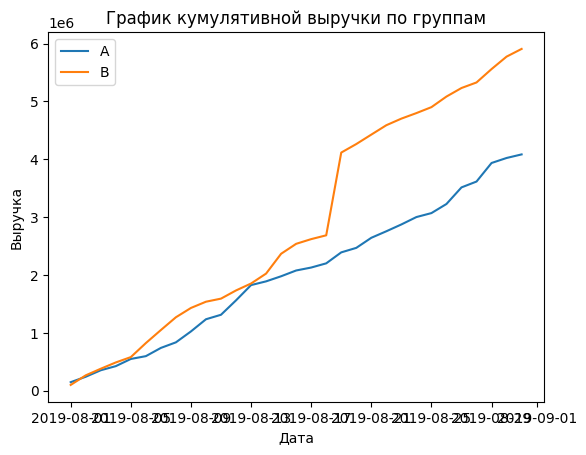

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.show();

Выручка группы А равномерно увеличивается в течение всего теста. Резких точек роста или снижения не обнаружено.
Однако график выручки группы В в середине резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### 3.2. Построим график кумулятивного среднего чека по группам.

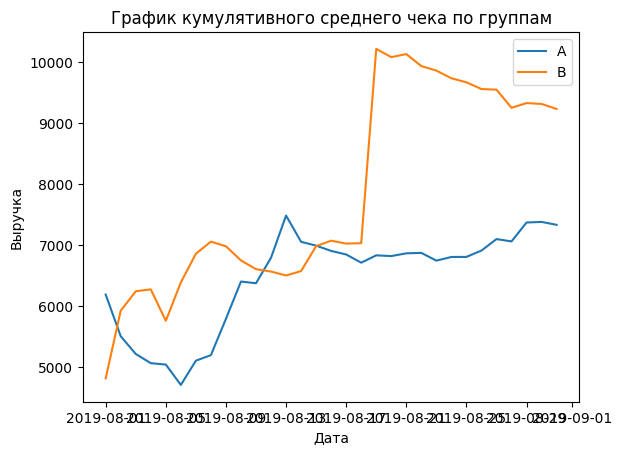

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.show();

Средний чек в группе А становится равномерным ближе к середине теста: установился на значении около 7000.
Для группы В средний чек резко расет на середине теста до 10000, а затем стабилизируется. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике).

### 3.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

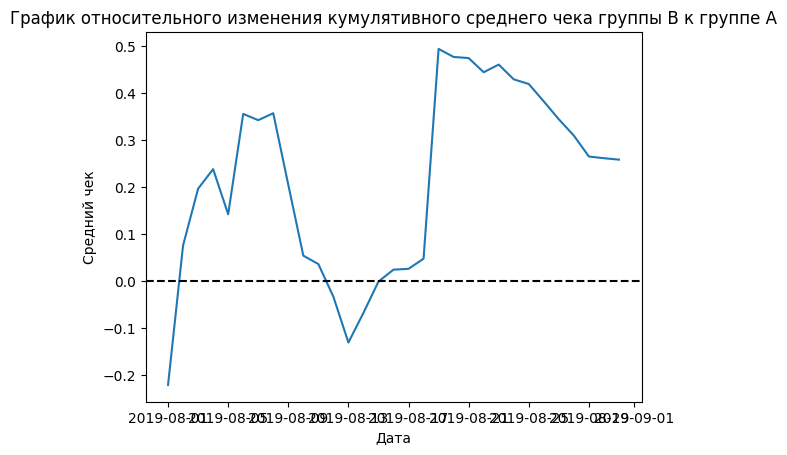

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show();

В нескольких точках график различия между сегментами резко «скачет». Это также говорит о наличии крупных заказов и выбросов.

### 3.4. Построим график кумулятивного среднего количества заказов на посетителя по группам.

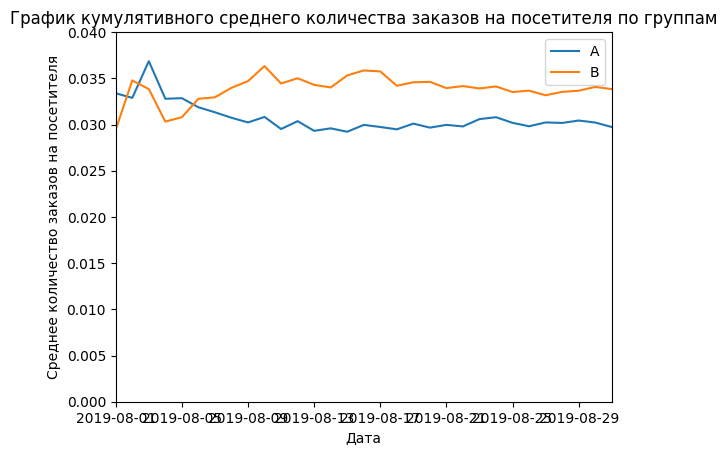

In [ ]:
# считаем количество заказов на посетителя
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.strptime("2019-08-01", '%Y-%m-%d'), dt.strptime("2019-08-31", '%Y-%m-%d'), 0, 0.04])
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show();

Группы колебались около одного значения, но затем среднее количество заказов на посетителя группы В вырвалось вперёд и зафиксировалось, а среднее количество заказов на посетителя группы А просело и также зафиксировалось.

### 3.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

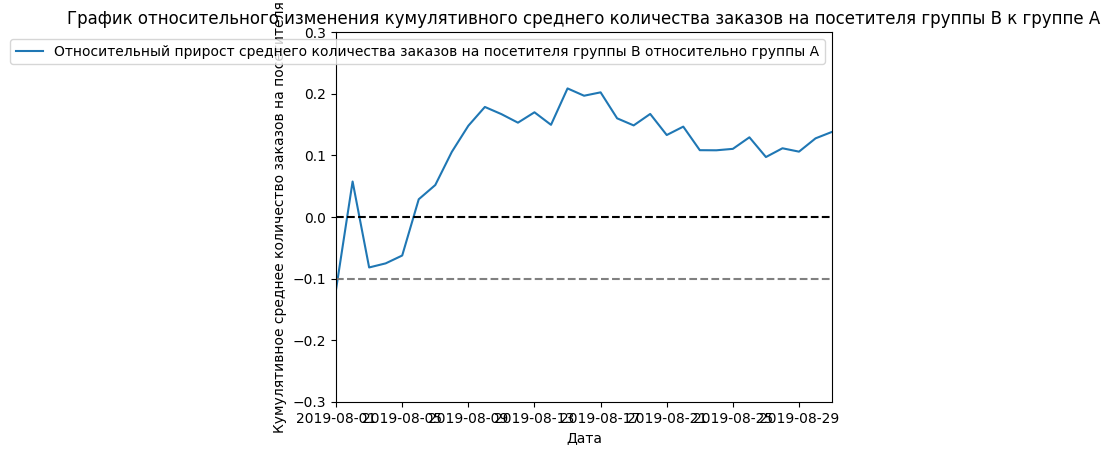

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','avg_orders']].merge(
    cumulativeDataB[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['avg_ordersB']/mergedCumulativeConversions['avg_ordersA']-1,
         label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.strptime("2019-08-01", '%Y-%m-%d'), dt.strptime("2019-08-31", '%Y-%m-%d'), -0.3, 0.3])

plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.title(
    'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A'
)
plt.show();


В начале теста заметны колебания кумулятивного среднего количества закзаов на посетителя. Затем группа B вырвалась вперёд. Кумулятивное среднее стабилизировалась на значении 0.2, к концу теста можно наблюдать незначительный спад, и в само конце теста - снова незначительный рост.

### 3.6. Построим точечный график количества заказов по пользователям.

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали 11, 9 и 8 заказов. Значительно больше, чем обычный пользователь за неделю.

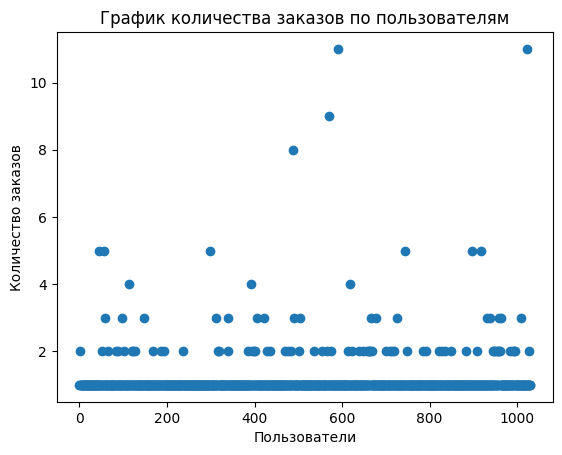

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('График количества заказов по пользователям')
plt.show();

Много пользователей с 2-5 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 3.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раза.
Разумно выбрать 2 или 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 3.8. Построим точечный график стоимостей заказов.

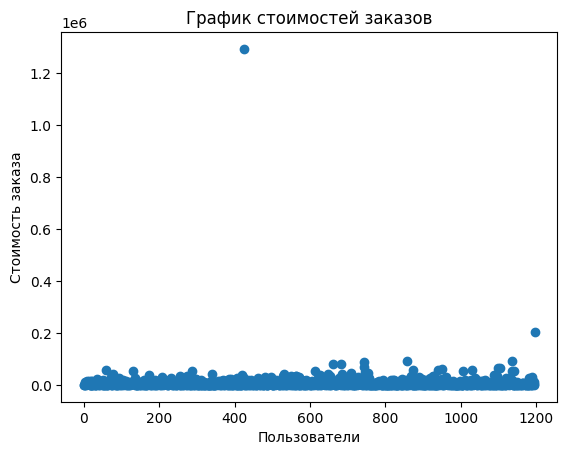

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.title('График стоимостей заказов')
plt.show();

 Есть немного дорогих заказов. Но их доля не ясна.

### 3.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 тыс. и не более 1% дороже 58 тыс. Разумно выбрать 28 тыс. за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

### 3.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.
 - Нулевая H: различий в среднем количестве заказов между группами нет.
 - Альтернативная: различия в среднем между группами есть.

 критический уровень статистической значимости
 alpha = 0.05

 Для проверки гипотезы используется метод для A/B-тестирования st.mannwhitneyu().

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-значение:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различия в среднем количестве заказов на посетителя между группами по сырым данным:',"{0:.3f}".format(
    sampleB.mean() / sampleA.mean() - 1))


p-значение: 0.017
Различия в среднем количестве заказов на посетителя между группами по сырым данным: 0.138


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

### 3.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

 - Нулевая гипотеза: различий в среднем чеке между группами нет.
 - Альтернативная гипотеза: различия в среднем чеке между группами есть.

 критический уровень статистической значимости
 alpha = 0.05

 Для проверки гипотезы используется метод для A/B-тестирования st.mannwhitneyu().

In [ ]:
print('p-значение:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Различия в среднем чеке заказа между группами по «сырым» данным:','{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.729
Различия в среднем чеке заказа между группами по «сырым» данным: 0.259


Поскольку p-value значительно больше alpha, средний чек группы B равен среднему чеку группы A. Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов. Средний чек группы B выше среднего чека группы A (25.9%).

### 3.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000 ]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
63


Всего 63 аномальных пользователя.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
print('p-значение:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным','{0:.3f}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.018
Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным 0.148


Результаты по среднему количеству заказов изменились не значительно.

### 3.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [ ]:
print('p-значение:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различия в среднем чеке заказа между группами по «очищенным» данным:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение: 0.977
Различия в среднем чеке заказа между группами по «очищенным» данным: -0.017


P-value увеличился.
Средний чек группы B ниже среднего чека группы A (1.7%), хотя при анализе сырых данных был больше на 25.9%. Изменение значительное

### 3.14. Вывод по результатм теста

Имеющиеся факты:

* И по сырым и по фильтрованным данным различия в среднем количестве закозов между группами А и В есть. Различия между сырыми и фильтрованными данными не значительные. Картина следующая: групп В больше группы А на примерно 14%;

* И по сырым и по фильтрованным данным различий в среднем чеке закза нет. Однако при фильтрации разница между группой А и группой В меняется: по сырым данным В больше А на 25.9%, по фильтрованным В меньше А на 1.7%.

* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A.

* График различия среднего чека говорит о том, что результаты группы B улучшаются к концу теста.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле хуже сегмента A невелика.